# Introdução

Nesse notebook vamos modelar uma MLP com os dados gerados do script **get-data-opencv.py**, a fim de classificarmos as coordenadas obtidas.

# Importando Libs e carregando dados

In [6]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("data/coords_to_train.csv")

df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,-0.081218,-0.004715,-0.040177,-0.162216,-0.043523,-0.067124,-0.222327,...,0.016552,-0.367654,-0.068592,0.006816,-0.425794,-0.080309,-0.010194,-0.478813,-0.089989,A
1,0.0,0.0,0.0,-0.085038,-0.005916,-0.035549,-0.168044,-0.052230,-0.057869,-0.225426,...,0.002777,-0.375811,-0.058233,-0.006361,-0.432085,-0.070056,-0.019292,-0.483020,-0.080153,A
2,0.0,0.0,0.0,-0.081697,-0.006424,-0.035047,-0.163370,-0.045816,-0.058749,-0.222580,...,0.003722,-0.371539,-0.060699,-0.005368,-0.428861,-0.071621,-0.017952,-0.480810,-0.081220,A
3,0.0,0.0,0.0,-0.093665,-0.004518,-0.030938,-0.175821,-0.045327,-0.049139,-0.234649,...,-0.004285,-0.372074,-0.056635,-0.012716,-0.430498,-0.068483,-0.023279,-0.483968,-0.078458,A
4,0.0,0.0,0.0,-0.091276,-0.009183,-0.031922,-0.172466,-0.052834,-0.052113,-0.231639,...,-0.003281,-0.377504,-0.059248,-0.010634,-0.435915,-0.068764,-0.020285,-0.490425,-0.077735,A


Text(0.5, 1.0, 'Contagem de frequência de cada Gesto')

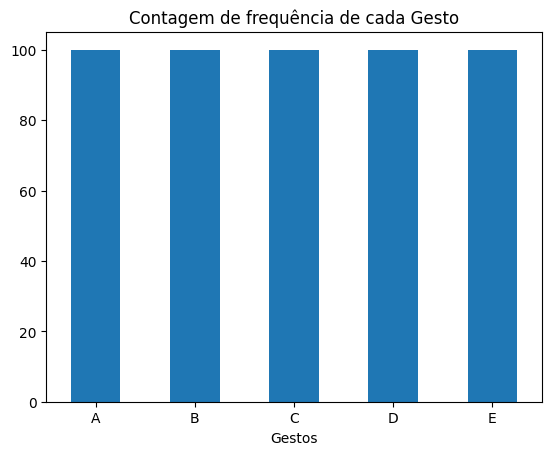

In [3]:
df["63"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.xlabel("Gestos")
plt.title("Contagem de frequência de cada Gesto")

Vamos realizar uma breve visualização

# Modeling

O melhor Loss é: 0.005610540281874732 
O melhor Validation Score é: None


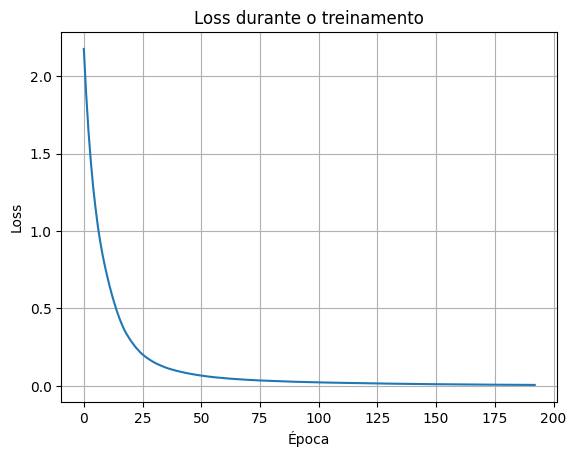

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=27, stratify=Y)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mlp = MLPClassifier((64,32), max_iter=300)

model_mlp.fit(X_train, y_train)

print(f"O melhor Loss é: {model_mlp.best_loss_}",
      "\n======================")

plt.plot(model_mlp.loss_curve_)
plt.title("Loss durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)

Loss baixissimo, comçou em mais que 2 e caiu para 0.005, o modelo aprendeu bem.

Pelo gráfico é possível ver que ele atinge um bom valor em 150 épocas.

In [5]:
Y_pred = model_mlp.predict(X_test)

print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        20
           B       0.95      1.00      0.98        20
           C       1.00      1.00      1.00        20
           D       1.00      0.90      0.95        20
           E       0.95      1.00      0.98        20

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  1  0 18  1]
 [ 0  0  0  0 20]]


Os gestos são muito distintos e os 500 samples por classe + MLP simples resolveram perfeitamente. Modelo pronto pra produção!

# Salvando o Modelo

In [7]:
joblib.dump(model_mlp, "models/modelo_mlp.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']